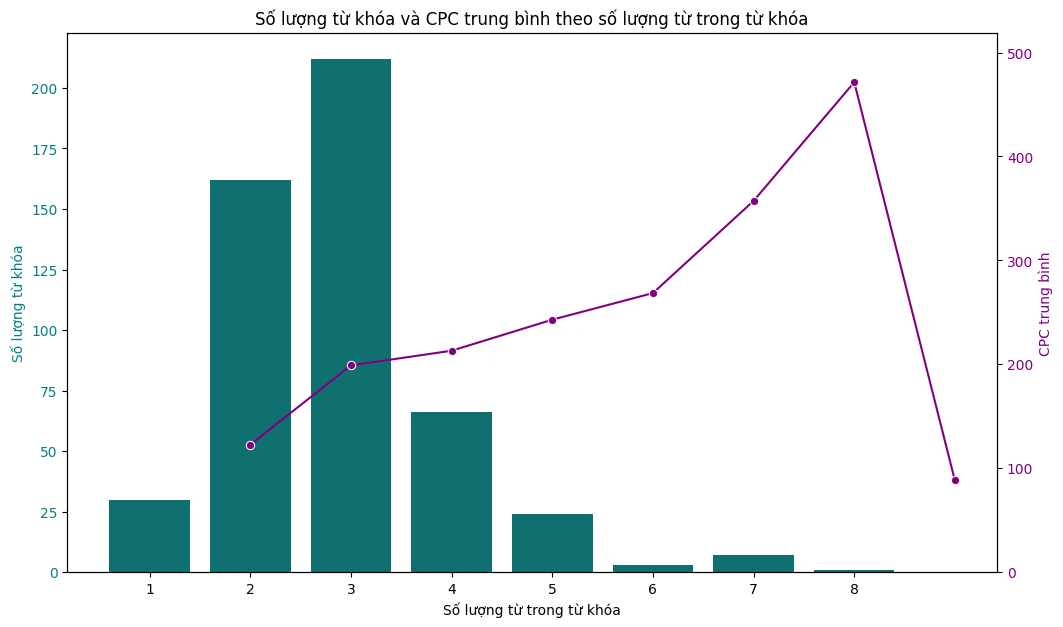

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
df = pd.read_csv(r'D:\CODING\Project\NVIDIA-Stock-prediction\data\raw\500+ High CPC Keywords List 2024.csv')

# Chuyển đổi cột 'cpc' thành kiểu số, xử lý lỗi nếu có
df['cpc'] = pd.to_numeric(df['cpc'], errors='coerce')

# Loại bỏ các hàng có giá trị NaN trong 'keyword' hoặc 'cpc'
df = df.dropna(subset=['keyword', 'cpc'])

# Thêm cột đếm số lượng từ trong từ khóa
df['word_count'] = df['keyword'].apply(lambda x: len(x.split()))

# Tính CPC trung bình và tần suất số lượng từ
avg_cpc_by_word_count = df.groupby('word_count')['cpc'].mean()
word_count_frequency = df['word_count'].value_counts().sort_index()

# Kết hợp cả hai vào một DataFrame để đảm bảo chỉ số trùng khớp
combined_df = pd.DataFrame({
    'word_count_frequency': word_count_frequency,
    'avg_cpc_by_word_count': avg_cpc_by_word_count
}).fillna(0)  # Điền 0 vào các giá trị NaN (nếu có)

# Vẽ biểu đồ kép với 2 trục y
fig, ax1 = plt.subplots(figsize=(12, 7))

# Biểu đồ cột cho tần suất số lượng từ (trục bên trái)
sns.barplot(x=combined_df.index, y=combined_df['word_count_frequency'], color='teal', ax=ax1)
ax1.set_xlabel('Số lượng từ trong từ khóa')
ax1.set_ylabel('Số lượng từ khóa', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Tạo trục y thứ hai cho CPC trung bình
ax2 = ax1.twinx()

# Vẽ biểu đồ đường cho CPC trung bình trên cùng trục x
# Sử dụng `combined_df.index` thay vì `combined_df['word_count_frequency'].index` để chắc chắn trục x khớp nhau
sns.lineplot(x=combined_df.index, y=combined_df['avg_cpc_by_word_count'], marker='o', color='purple', ax=ax2)
ax2.set_ylabel('CPC trung bình', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Đặt giới hạn cho trục y bên phải để giảm khoảng cách
ax2.set_ylim(0, combined_df['avg_cpc_by_word_count'].max() * 1.1)

# Thêm tiêu đề chung cho biểu đồ
plt.title('Số lượng từ khóa và CPC trung bình theo số lượng từ trong từ khóa')

# Hiển thị đồ thị
plt.show()
